# **Proyecto Parcial 1**

**José Ricardo Jáuregui Guevara - 608995**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score

# Planteamiento del problema y contexto de los datos

En México, la desigualdad en los ingresos de los hogares es un tema de alta relevancia social y económica, ya que influye directamente en el bienestar, el acceso a oportunidades y la formulación de políticas públicas. Comprender qué características de los hogares están asociadas con mayores o menores niveles de ingreso permite generar evidencia útil para la toma de decisiones y para el diseño de intervenciones focalizadas.

En este proyecto se analiza la relación entre diversas características sociodemográficas del hogar y el ingreso corriente total, con el objetivo de identificar qué factores están estadísticamente asociados con el nivel de ingreso de los hogares mexicanos. A partir de este análisis se busca obtener un modelo que permita caracterizar el comportamiento del ingreso y comprender la importancia relativa de distintas variables explicativas.

Los datos utilizados provienen de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2014, elaborada por el Instituto Nacional de Estadística y Geografía (INEGI). Esta encuesta es una fuente oficial que recopila información detallada sobre la composición de los hogares, características de sus integrantes y distintas fuentes de ingreso, mediante un diseño muestral probabilístico y representativo a nivel nacional. En particular, se utiliza el conjunto de “Principales variables por hogar”, el cual concentra indicadores clave a nivel hogar y facilita el análisis econométrico.

La variable de interés a predecir es el ingreso corriente total del hogar (ing_cor), la cual representa el flujo total de recursos monetarios y no monetarios que recibe el hogar durante el periodo de referencia. Esta variable tiene un significado económico claro y ampliamente utilizado en estudios de bienestar y desigualdad, por lo que resulta adecuada como variable dependiente del modelo.

Se adopta un enfoque de regresión debido a que la variable de interés es cuantitativa continua y se busca modelar su relación con múltiples variables explicativas del hogar, tales como características del jefe del hogar, composición demográfica y condiciones socioeconómicas. Los modelos de regresión permiten no solo predecir el nivel esperado de ingreso bajo ciertas condiciones, sino también interpretar la dirección y magnitud de las asociaciones entre las variables, lo cual es fundamental para cumplir el objetivo analítico del presente estudio.

# Exploración inical de los datos

In [37]:
df = pd.read_csv('mcs_concentrado_2014_concil_2010.csv')
print('El conjunto de datos contiene X filas y Y variables a nivel hogar:',df.shape)
df.head()

El conjunto de datos contiene X filas y Y variables a nivel hogar: (58125, 59)


,proyecto,folioviv,foliohog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor_hog,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,menores,p12_64,p65mas,ocupados,percep_ing,perc_ocupa,ing_cor,ingtrab,trabajo,sueldos,horas_extr,comisiones,aguinaldo,indemtrab,otra_rem,remu_espec,negocio,noagrop,industria,comercio,servicios,agrope,agricolas,pecuarios,reproducc,pesca,otros_trab,rentas,utilidad,arrenda,transfer,jubilacion,becas,donativos,remesas,bene_gob,transf_hog,trans_inst,estim_alqu,otros_ing,smg
0,1,100014201,1,10010000,000-0,1,3,7,2620,168,2,1,50,10,4,3,1,4,0,4,0,2,3,2,27587.87,10839.11,8315.20,7043.47,0.0,0.0,0.00,0.0,1271.73,0.0,2523.91,2523.91,0.0,0.0,2523.91,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,5135.86,0.00,2347.82,2788.04,0.0,0.0,0.00,0.0,11612.90,0.0,5739.3
1,1,100014202,1,10010000,000-0,1,3,7,2620,168,2,2,54,10,5,3,2,5,0,5,0,0,2,0,46861.84,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,38152.17,26413.04,11739.13,0.00,0.0,0.0,0.00,0.0,8709.67,0.0,5739.3
2,1,100014203,1,10010000,000-0,1,3,7,2620,168,2,2,36,7,2,1,1,2,0,2,0,0,1,0,11435.44,1369.56,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1369.56,0.0,0.0,0.0,10065.88,0.00,0.00,0.00,0.0,0.0,10065.88,0.0,0.00,0.0,5739.3
3,1,100014204,1,10010000,000-0,1,3,7,2620,168,2,2,32,6,4,2,2,3,1,3,0,1,1,1,28748.24,18586.95,18586.95,17608.69,0.0,0.0,0.00,0.0,978.26,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,10161.29,0.0,5739.3
4,1,100014205,1,10010000,000-0,1,3,7,2620,168,3,1,59,10,4,1,3,4,0,4,0,2,3,2,38319.41,25826.08,24945.65,23478.26,0.0,0.0,978.26,0.0,489.13,0.0,880.43,880.43,0.0,0.0,880.43,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,880.43,0.00,880.43,0.00,0.0,0.0,0.00,0.0,11612.90,0.0,5739.3


El conjunto de datos analizado contiene un total de 59 variables. En términos de tipos de datos, predominan las variables numéricas, con 23 variables de tipo entero y 35 de tipo flotante, además de una variable de tipo categórico (ageb). Esta composición resulta adecuada para la aplicación de modelos de regresión, ya que la mayoría de las variables son cuantitativas y potencialmente utilizables como predictores. En general, el conjunto presenta una estructura consistente y apropiada para proceder con el análisis exploratorio y el modelado posterior, aunque será necesario evaluar la presencia de asimetrías, valores atípicos y posibles redundancias entre variables.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58125 entries, 0 to 58124
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tam_loc      58125 non-null  int64  
 1   est_socio    58125 non-null  int64  
 2   factor_hog   58125 non-null  int64  
 3   clase_hog    58125 non-null  int64  
 4   sexo_jefe    58125 non-null  int64  
 5   edad_jefe    58125 non-null  int64  
 6   educa_jefe   58125 non-null  int64  
 7   tot_integ    58125 non-null  int64  
 8   hombres      58125 non-null  int64  
 9   mujeres      58125 non-null  int64  
 10  mayores      58125 non-null  int64  
 11  menores      58125 non-null  int64  
 12  p12_64       58125 non-null  int64  
 13  p65mas       58125 non-null  int64  
 14  ocupados     58125 non-null  int64  
 15  percep_ing   58125 non-null  int64  
 16  perc_ocupa   58125 non-null  int64  
 17  ing_cor      58125 non-null  float64
 18  ingtrab      58125 non-null  float64
 19  trab

**Diccionario de datos**

*Identificación y diseño muestral*
- proyecto: Identificador del levantamiento o proyecto estadístico.
- folioviv: Folio único de la vivienda.
- foliohog: Folio del hogar dentro de la vivienda.
- ubica_geo: Clave geográfica que identifica la ubicación (estado, municipio y localidad).
- ageb: Área Geoestadística Básica correspondiente a la vivienda.
- tam_loc: Tamaño de la localidad donde se ubica el hogar.
- est_socio: Estrato socioeconómico asignado en el diseño de la muestra.
- est_dis: Estrato de diseño muestral.
- upm: Unidad Primaria de Muestreo.
- factor_hog: Factor de expansión del hogar (peso para inferencia poblacional).

*Características del hogar*
- clase_hog: Tipo de hogar según su composición.
- sexo_jefe: Sexo del jefe del hogar.
- edad_jefe: Edad del jefe del hogar (años).
- educa_jefe: Nivel de escolaridad del jefe del hogar.
- tot_integ: Número total de integrantes del hogar.
- hombres: Número de hombres en el hogar.
- mujeres: Número de mujeres en el hogar.
- mayores: Número de integrantes de 18 años o más.
- menores: Número de integrantes menores de 18 años.
- p12_64: Número de personas de 12 a 64 años.
- p65mas: Número de personas de 65 años o más.
- ocupados: Número de integrantes ocupados.
- percep_ing: Número de perceptores de ingreso en el hogar.
- perc_ocupa: Número de perceptores de ingreso que están ocupados.

*Ingreso total*
- ing_cor: Ingreso corriente total del hogar (monetario y no monetario).

*Ingresos por trabajo*
- ingtrab: Ingreso total por trabajo.
- trabajo: Total de percepciones por trabajo.
- sueldos: Sueldos y salarios.
- horas_extr: Pagos por horas extra.
- comisiones: Ingresos por comisiones.
- aguinaldo: Aguinaldo recibido.
- indemtrab: Indemnizaciones por trabajo.
- otra_rem: Otras remuneraciones monetarias.
- remu_espec: Remuneraciones en especie.

*Ingresos por negocios*
- negocio: Ingreso por negocios del hogar.
- noagrop: Ingresos de negocios no agropecuarios.
- industria: Ingresos de actividades industriales.
- comercio: Ingresos de actividades comerciales.
- servicios: Ingresos de actividades de servicios.

*Actividades agropecuarias*
- agrope: Total de ingresos agropecuarios.
- agricolas: Ingresos por actividades agrícolas.
- pecuarios: Ingresos por actividades pecuarias.
- reproducc: Ingresos por reproducción de animales.
- pesca: Ingresos por pesca y caza.

*Otros ingresos laborales*
- otros_trab: Otros ingresos por trabajo no clasificados.

*Rentas y capital*
- rentas: Ingresos por rentas de la propiedad.
- utilidad: Utilidades recibidas.
- arrenda: Ingresos por arrendamiento.

*Transferencias*
- transfer: Total de transferencias recibidas.
- jubilacion: Ingresos por jubilaciones y pensiones.
- becas: Ingresos por becas.
- donativos: Donativos recibidos.
- remesas: Remesas del extranjero.
- bene_gob: Beneficios de programas gubernamentales.
- transf_hog: Transferencias de otros hogares.
- trans_inst: Transferencias de instituciones.

*Ingresos imputados y otros*
- estim_alqu: Estimación del alquiler imputado de la vivienda propia.
- otros_ing: Otros ingresos corrientes.
- smg: Salario mínimo general de referencia.

# Preparación y limpieza de datos

Antes de estimar el modelo de regresión se realizó un proceso de depuración y preparación de la base de datos, abordando problemas comunes en datos reales con el fin de garantizar la validez estadística de los resultados.

En primer lugar, se verificó la presencia de valores faltantes, encontrándose que ninguna de las variables presenta datos nulos. Esta situación permitió trabajar con la muestra completa sin necesidad de imputaciones ni eliminación de registros, evitando la introducción de sesgos por pérdida de información.

Se realizó un proceso de limpieza inicial del conjunto de datos con el objetivo de asegurar su calidad antes del modelado. En particular, se identificaron y eliminaron variables que funcionaban únicamente como identificadores (IDs), tales como claves únicas de vivienda, hogar, ubicación geográfica y elementos del diseño muestral. Estas variables no aportan información predictiva relevante y podrían introducir ruido o sesgos en el modelo al representar valores únicos sin significado analítico. La eliminación de dichas columnas permitió trabajar con un conjunto de datos más adecuado, enfocado en variables con valor explicativo real, facilitando así un análisis más robusto y una mejor construcción de modelos de aprendizaje automático.

Se analizó la presencia de valores atípicos en las variables de ingreso, particularmente en ing_cor y sus componentes. Se observó una fuerte asimetría a la derecha y la existencia de valores extremos elevados, lo cual es consistente con la naturaleza de los ingresos en hogares reales. Para mitigar el efecto de estos valores sobre el modelo lineal y estabilizar la varianza, se aplicó una transformación logarítmica a la variable de ingreso corriente (log_ing_cor). Esta transformación reduce la influencia de observaciones extremas, mejora la aproximación a la normalidad y permite interpretar los coeficientes en términos porcentuales.

Se evaluó la posible multicolinealidad entre variables explicativas, especialmente entre los distintos componentes del ingreso laboral (por ejemplo, ingtrab, trabajo, sueldos, aguinaldo, entre otros), los cuales presentan correlaciones elevadas por construcción. La presencia de multicolinealidad puede inflar las varianzas de los estimadores y dificultar la interpretación individual de los coeficientes. Por ello, se decidió revisar las correlaciones y considerar la selección de variables representativas, priorizando aquellas con mayor sustento teórico y menor redundancia. Esta decisión busca mejorar la estabilidad del modelo y la interpretabilidad de los resultados.

En conjunto, estas acciones permiten trabajar con un conjunto de datos más adecuado para el modelado econométrico, reduciendo problemas de sesgo, varianza inflada y mala especificación funcional.

In [38]:
df.isnull().sum().sort_values(ascending=False)

proyecto      0
otros_trab    0
otra_rem      0
remu_espec    0
negocio       0
noagrop       0
industria     0
comercio      0
servicios     0
agrope        0
agricolas     0
pecuarios     0
reproducc     0
pesca         0
rentas        0
aguinaldo     0
utilidad      0
arrenda       0
transfer      0
jubilacion    0
becas         0
donativos     0
remesas       0
bene_gob      0
transf_hog    0
trans_inst    0
estim_alqu    0
otros_ing     0
indemtrab     0
comisiones    0
folioviv      0
tot_integ     0
foliohog      0
ubica_geo     0
ageb          0
tam_loc       0
est_socio     0
est_dis       0
upm           0
factor_hog    0
clase_hog     0
sexo_jefe     0
edad_jefe     0
educa_jefe    0
hombres       0
horas_extr    0
mujeres       0
mayores       0
menores       0
p12_64        0
p65mas        0
ocupados      0
percep_ing    0
perc_ocupa    0
ing_cor       0
ingtrab       0
trabajo       0
sueldos       0
smg           0
dtype: int64

Se realizó una revisión de valores faltantes en el conjunto de datos mediante el conteo de valores nulos por variable. Los resultados indican que ninguna de las 59 variables presenta valores faltantes, es decir, todas las columnas cuentan con 58,125 observaciones válidas. Esta característica representa una ventaja importante para el análisis, ya que no es necesario aplicar técnicas de imputación ni eliminar registros por problemas de información incompleta. No obstante, la ausencia de valores nulos no garantiza por sí misma la calidad total de los datos, por lo que en las siguientes etapas se continuará evaluando la presencia de valores atípicos, asimetrías y posibles redundancias entre variables que puedan afectar el desempeño de los modelos de regresión.

In [39]:
columnas_ids = [
    "proyecto",
    "folioviv",
    "foliohog",
    "ubica_geo",
    "ageb",
    "est_dis",
    "upm"
]

df = df.drop(columns=columnas_ids, errors="ignore")

La eliminación de variables identificadoras se realizó durante la etapa de preparación y tratamiento de los datos, ya que dichas variables (como folioviv, foliohog, proyecto, ubica_geo, ageb, est_dis y upm) funcionan únicamente como claves únicas o elementos del diseño muestral y no aportan información predictiva relevante para el análisis. Mantener este tipo de variables podría introducir ruido en el modelo, generar sobreajuste o provocar que los algoritmos aprendan patrones artificiales asociados a identificadores únicos en lugar de relaciones reales entre las variables. Por esta razón, se decidió eliminarlas antes del modelado, asegurando que el conjunto de datos se componga únicamente de variables con significado analítico y potencial explicativo, lo cual mejora la calidad del análisis y la interpretabilidad de los resultados.

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tam_loc,58125.0,2.191088,1.242586,1.0,1.00,2.00,3.00,4.00
est_socio,58125.0,2.186787,0.832664,1.0,2.00,2.00,3.00,4.00
factor_hog,58125.0,553.125161,512.548319,69.0,241.00,438.00,657.00,15849.00
clase_hog,58125.0,2.163269,0.618690,1.0,2.00,2.00,2.00,5.00
sexo_jefe,58125.0,1.260456,0.438887,1.0,1.00,1.00,2.00,2.00
edad_jefe,58125.0,48.766245,15.751062,13.0,37.00,47.00,60.00,97.00
educa_jefe,58125.0,5.534538,2.619145,1.0,3.00,6.00,8.00,11.00
tot_integ,58125.0,3.720430,1.855041,1.0,2.00,4.00,5.00,21.00
hombres,58125.0,1.817548,1.179039,0.0,1.00,2.00,2.00,11.00
mujeres,58125.0,1.902882,1.206636,0.0,1.00,2.00,3.00,13.00


El análisis descriptivo de las variables numéricas muestra que el conjunto de datos presenta una alta heterogeneidad, particularmente en las variables de ingreso. En términos demográficos, el jefe del hogar tiene en promedio 48.8 años y un nivel educativo medio de 5.53, mientras que los hogares están conformados en promedio por 3.72 integrantes. La variable de interés, ingreso corriente total del hogar (ing_cor), presenta una media de aproximadamente 38,213 pesos y una desviación estándar considerablemente alta (70,876), lo que sugiere una distribución fuertemente asimétrica con presencia de valores extremos, situación consistente con la desigualdad de ingresos observada en la realidad. Este patrón de alta dispersión también se observa en componentes específicos del ingreso como sueldos, negocio y rentas, donde la mediana es sustancialmente menor que la media y muchos valores se concentran en cero. En conjunto, estos resultados indican la posible existencia de sesgo positivo y valores atípicos, por lo que será importante considerar transformaciones o técnicas robustas durante la etapa de modelado.

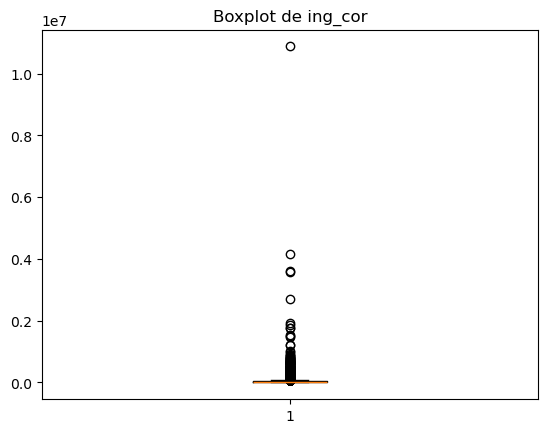

In [41]:
plt.boxplot(df['ing_cor'])
plt.title('Boxplot de ing_cor')
plt.show()

La variable de ingreso corriente presenta una fuerte asimetría positiva y valores extremos altos, lo cual es consistente con la distribución típica del ingreso en la población. En lugar de eliminar estos valores, se aplicó una transformación logarítmica para reducir la asimetría y mejorar el ajuste del modelo de regresión.

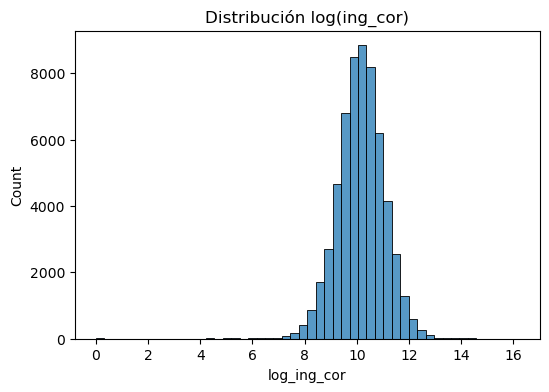

In [42]:
df["log_ing_cor"] = np.log1p(df["ing_cor"])

plt.figure(figsize=(6,4))
sns.histplot(df["log_ing_cor"], bins=50)
plt.title("Distribución log(ing_cor)")
plt.show()

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.corr(numeric_only=True)

,tam_loc,est_socio,factor_hog,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,menores,p12_64,p65mas,ocupados,percep_ing,perc_ocupa,ing_cor,ingtrab,trabajo,sueldos,horas_extr,comisiones,aguinaldo,indemtrab,otra_rem,remu_espec,negocio,noagrop,industria,comercio,servicios,agrope,agricolas,pecuarios,reproducc,pesca,otros_trab,rentas,utilidad,arrenda,transfer,jubilacion,becas,donativos,remesas,bene_gob,transf_hog,trans_inst,estim_alqu,otros_ing,smg,log_ing_cor
tam_loc,1.000000,-0.644874,-0.095067,-0.002270,-0.068076,0.047744,-0.352602,0.077700,0.075257,0.045918,0.034661,0.091185,0.009926,0.058540,0.005909,0.148210,-0.014776,-0.159933,-0.217902,-0.245646,-0.246583,-0.052041,-0.080090,-0.157989,-0.015558,-0.080403,-0.034874,0.006384,-0.038115,0.003850,-0.014342,-0.054650,0.041438,0.059568,0.048843,0.009153,0.006850,-0.018519,-0.017361,-0.013733,-0.030874,-0.058957,-0.114451,-0.040904,-0.055020,0.053895,0.295835,-0.036024,-0.007468,-0.239708,-0.013079,-0.317871,-0.362916
est_socio,-0.644874,1.000000,0.072610,-0.026003,0.055610,0.001397,0.450988,-0.123933,-0.110897,-0.082170,-0.063152,-0.134888,-0.050214,-0.022768,-0.054488,-0.178664,-0.036776,0.232493,0.287190,0.317304,0.324291,0.046499,0.088918,0.232077,0.018810,0.128625,0.022951,0.002606,0.034456,-0.015149,0.014651,0.055974,-0.026389,-0.040590,-0.033230,-0.015115,-0.001930,0.027549,0.036205,0.028901,0.062506,0.117036,0.173107,0.066858,0.086773,-0.023814,-0.272273,0.049374,0.003258,0.355072,0.016829,0.266739,0.433081
factor_hog,-0.095067,0.072610,1.000000,0.005997,0.000283,0.021034,0.022635,0.005145,-0.001953,0.009818,0.019941,-0.017635,0.014105,0.011762,-0.015611,-0.032162,-0.011851,0.025894,0.029794,0.037362,0.050849,-0.013962,-0.000965,0.023041,-0.002187,0.007471,-0.018038,-0.006116,0.002030,-0.008795,-0.000679,0.011531,-0.009839,-0.010668,-0.010922,-0.002485,-0.003248,-0.001802,0.000927,0.000616,0.002480,0.008702,0.013578,0.015103,0.007171,-0.020431,-0.026174,0.000630,0.005722,0.096601,-0.009208,0.256277,0.038244
clase_hog,-0.002270,-0.026003,0.005997,1.000000,0.019406,0.041396,-0.069933,0.547202,0.372070,0.477689,0.543484,0.240529,0.464251,0.112103,0.377116,0.425085,0.369400,0.073211,0.118316,0.112111,0.113114,0.023540,0.023008,0.030343,0.006088,0.006846,0.042331,0.030889,0.030665,0.018473,0.015489,0.021859,0.014268,0.014143,0.013669,0.000963,0.006104,0.024508,-0.003392,-0.003213,-0.002271,0.059524,0.023901,0.026274,0.059489,0.044341,0.091149,-0.006963,0.016399,0.011466,0.003733,-0.005810,0.211541
sexo_jefe,-0.068076,0.055610,0.000283,0.019406,1.000000,0.142829,-0.104265,-0.161059,-0.321535,0.066576,-0.145848,-0.089732,-0.155793,0.051399,-0.131291,-0.064135,-0.120644,-0.041456,-0.089371,-0.083997,-0.089062,-0.026858,-0.018156,-0.054753,-0.006435,-0.024876,-0.002578,-0.027885,-0.033877,-0.031521,-0.018453,-0.013737,-0.007518,-0.022055,-0.021052,-0.006520,0.007416,-0.011837,-0.012275,-0.011429,-0.009618,0.066963,0.021710,-0.004689,0.141525,0.074934,-0.027947,0.028712,0.004700,0.007106,-0.007625,0.016517,-0.073858
edad_jefe,0.047744,0.001397,0.021034,0.041396,0.142829,1.000000,-0.395898,-0.128978,-0.128581,-0.072646,0.101422,-0.364612,-0.159297,0.663042,-0.065140,0.040116,-0.081191,0.006125,-0.098608,-0.112472,-0.107766,-0.050403,-0.045575,-0.047436,-0.001495,-0.032653,-0.032759,0.010785,0.001936,0.000406,0.003164,-0.001119,0.012575,0.017850,0.015983,0.004356,0.001710,-0.019477,0.010623,0.004966,0.043289,0.180957,0.217066,-0.017244,0.032349,0.004858,0.188447,-0.000937,0.010772,0.133559,0.008932,-0.015023,-0.049207
educa_jefe,-0.352602,0.450988,0.022635,-0.069933,-0.104265,-0.395898,1.000000,-0.072506,-0.039663,-0.072711,-0.105510,0.013068,0.019556,-0.308145,-0.017011,-0.173687,-0.003035,0.239594,0.333116,0.365496,0.378319,0.048828,0.080361,0.298379,0.023531,0.149673,0.012711,0.007385,0.034563,-0.008372,0.012791,0.053603,-0.020166,-0.024269,-0.021087,-0.009742,-0.005695,0.033178,0.037969,0.032619,0.049156,0.060644,0.117050,0.080519,0.029468,-0.023777,-0.27

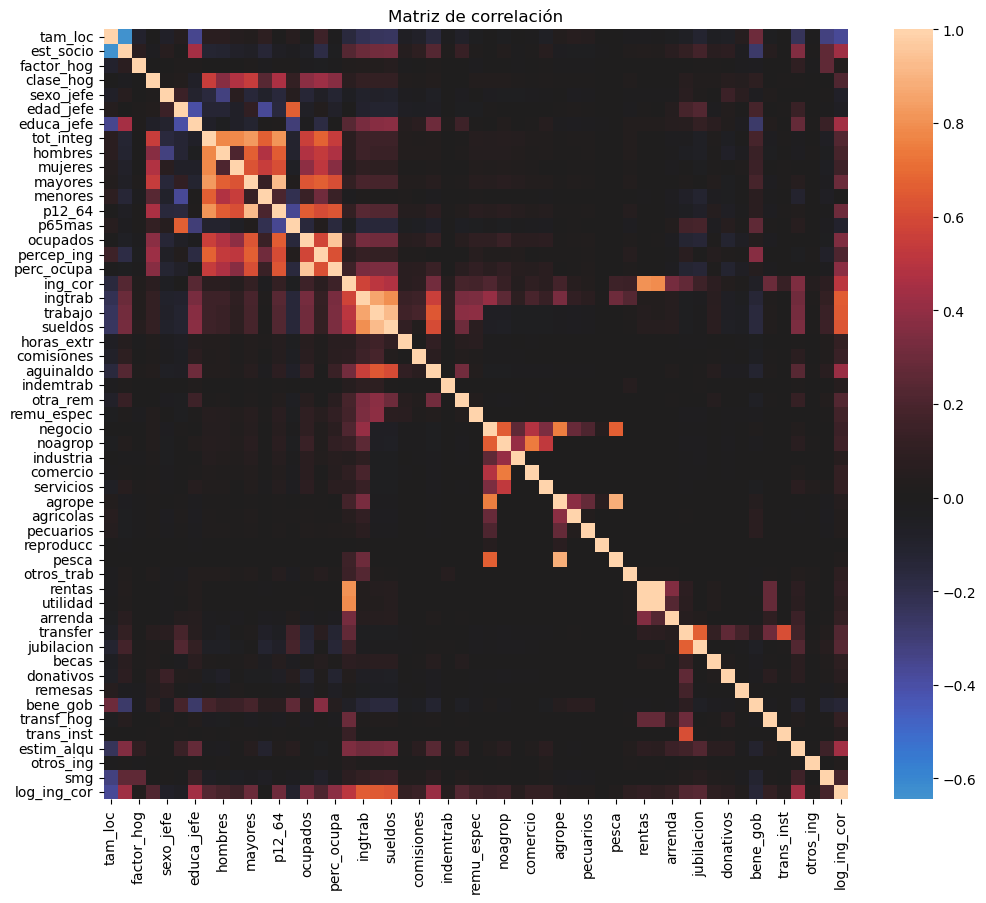

In [44]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, center=0)
plt.title("Matriz de correlación")
plt.show()

La matriz de correlación revela patrones coherentes con la estructura socioeconómica de los hogares. Se observa un bloque de correlaciones positivas moderadas entre variables demográficas del hogar (como número de integrantes, hombres, mayores y población en edad laboral), lo cual es esperado debido a que todas derivan del tamaño y composición del hogar. Asimismo, las variables relacionadas con ingresos laborales (por ejemplo, ingtrab, sueldos y perc_ocupa) presentan correlaciones positivas entre sí, indicando posible redundancia o multicolinealidad parcial que deberá considerarse al construir el modelo. En contraste, la mayoría de las demás variables muestran correlaciones bajas cercanas a cero, lo que sugiere relativa independencia lineal. En conjunto, la matriz indica que el modelo de regresión es viable, aunque será necesario vigilar la multicolinealidad entre variables estrechamente relacionadas para evitar inestabilidad en los coeficientes.

In [45]:
corr_target = corr["log_ing_cor"].sort_values(ascending=False)
corr_target.head(59)

log_ing_cor    1.000000
ingtrab        0.659030
trabajo        0.651657
sueldos        0.634136
ing_cor        0.507590
estim_alqu     0.441560
educa_jefe     0.440128
est_socio      0.433081
aguinaldo      0.418424
perc_ocupa     0.378492
ocupados       0.346679
p12_64         0.304991
mayores        0.288722
jubilacion     0.240142
transfer       0.228026
otra_rem       0.226298
tot_integ      0.221014
clase_hog      0.211541
percep_ing     0.206173
hombres        0.187171
smg            0.185128
remu_espec     0.170483
noagrop        0.164416
mujeres        0.156889
negocio        0.142525
comisiones     0.137049
horas_extr     0.119710
servicios      0.114409
arrenda        0.113919
transf_hog     0.110787
comercio       0.107530
rentas         0.100481
becas          0.091536
utilidad       0.088600
otros_trab     0.088198
donativos      0.062851
industria      0.057663
indemtrab      0.054118
trans_inst     0.047049
agrope         0.045984
otros_ing      0.041873
pecuarios      0

El análisis de correlación utilizando la variable transformada log_ing_cor muestra relaciones más consistentes y estables con las variables asociadas al ingreso laboral. Las correlaciones más altas se observan con ingtrab (0.659), trabajo (0.652) y sueldos (0.634), lo cual es coherente, ya que el ingreso corriente del hogar depende principalmente de las remuneraciones laborales. A diferencia del análisis en niveles, la transformación logarítmica reduce la influencia de valores extremos, permitiendo identificar mejor la relación estructural entre el ingreso y sus componentes.

Asimismo, variables sociodemográficas como educa_jefe (0.440) y est_socio (0.433) muestran correlaciones moderadas y positivas, lo que sugiere que mayores niveles educativos y mejor condición socioeconómica están asociados con incrementos proporcionales en el ingreso del hogar. También se observa una relación positiva con variables que reflejan participación laboral del hogar (perc_ocupa, ocupados, p12_64), lo cual respalda la hipótesis económica de que una mayor inserción en el mercado de trabajo incrementa el ingreso.

En conjunto, los resultados confirman que la transformación logarítmica permite capturar de manera más clara las relaciones económicas subyacentes y resulta más adecuada para la modelación mediante regresión lineal, especialmente ante la presencia de asimetría y alta dispersión en la variable de ingreso.

# Selección de características

In [59]:
import numpy as np
import scipy.stats as stats

# columnas a excluir
cols_excluir = [
    'ing_cor', 'log_ing_cor',      # target y derivadas
    'factor_hog', 'smg',           # diseño muestral / constantes
    # componentes del ingreso
    'ingtrab','trabajo','sueldos','horas_extr','comisiones','aguinaldo',
    'indemtrab','otra_rem','remu_espec',
    'negocio','noagrop','industria','comercio','servicios',
    'agrope','agricolas','pecuarios','reproducc','pesca','otros_trab',
    'rentas','utilidad','arrenda',
    'transfer','jubilacion','becas','donativos','remesas',
    'bene_gob','transf_hog','trans_inst',
    'estim_alqu','otros_ing',
    'perc_ocupa'
]

# seleccionar variables candidatas
X = df.drop(columns=cols_excluir, errors="ignore")
y = df['log_ing_cor']

print(f"Variables candidatas: {X.shape[1]}")

def ols_pvalues(X, y):
    X_mat = np.column_stack([np.ones(len(X)), X.values])
    y_vec = y.values
    
    n, k = X_mat.shape
    
    XtX_inv = np.linalg.pinv(X_mat.T @ X_mat)
    beta = XtX_inv @ X_mat.T @ y_vec
    
    resid = y_vec - X_mat @ beta
    s2 = (resid @ resid) / (n - k)
    
    se = np.sqrt(np.diag(s2 * XtX_inv))
    t_stats = beta / se
    
    p_vals = 2 * stats.t.sf(np.abs(t_stats), df=n - k)
    
    return dict(zip(['const'] + list(X.columns), p_vals))

Variables candidatas: 15


Durante la selección de características se excluyeron variables que podían introducir sesgos en el modelo o generar relaciones artificiales. En primer lugar, se eliminó la variable objetivo y sus transformaciones para evitar data leakage, ya que su inclusión permitiría al modelo aprender directamente la respuesta en lugar de identificar patrones reales. Asimismo, se descartaron variables asociadas al diseño muestral o parámetros de referencia (como pesos estadísticos), debido a que no representan características socioeconómicas del hogar. Finalmente, se eliminaron componentes específicos del ingreso total, dado que forman parte de la definición contable de la variable objetivo; incluirlas implicaría predecir una suma a partir de sus propios elementos, provocando multicolinealidad perfecta y resultados inflados que no reflejan relaciones reales. Estas decisiones permitieron construir un conjunto de variables predictoras más adecuado y metodológicamente sólido.

In [63]:
# Eliminación para atrás
ALPHA = 0.05

features_back = list(X.columns)
eliminadas_back = []
while True:
    
    # calcular p-valores
    pvals = ols_pvalues(X[features_back], y)
    pvals.pop('const', None)  # quitar intercepto
    
    # variable con mayor p-valor
    worst_var = max(pvals, key=pvals.get)
    worst_p   = pvals[worst_var]
    
    # condición de parada
    if worst_p <= ALPHA:
        print("Todas las variables son significativas.")
        break
    
    # eliminar variable
    print(f"Eliminar: {worst_var} (p = {worst_p:.4f})")
    eliminadas_back.append(worst_var)
    features_back.remove(worst_var)

print(f"\nVariables finales: {features_back}")


Eliminar: mujeres (p = 0.6084)
Eliminar: tot_integ (p = 0.9772)
Eliminar: hombres (p = 0.4775)
Todas las variables son significativas.

Variables finales: ['tam_loc', 'est_socio', 'clase_hog', 'sexo_jefe', 'edad_jefe', 'educa_jefe', 'mayores', 'menores', 'p12_64', 'p65mas', 'ocupados', 'percep_ing']


Se utilizó el método de eliminación hacia atrás (backward elimination) para seleccionar un subconjunto de variables relevantes. Este procedimiento inicia con todas las variables candidatas y, en cada iteración, ajusta un modelo de regresión OLS para evaluar la significancia estadística de cada predictor mediante sus p-valores. La variable con el mayor p-valor es eliminada si supera el nivel de significancia establecido (α = 0.05), repitiendo el proceso hasta que todas las variables restantes sean estadísticamente significativas. Este enfoque permite evaluar cada variable considerando la presencia de las demás, reduciendo efectos de confusión y ayudando a construir un modelo más parsimonioso, evitando incluir variables irrelevantes que puedan aumentar la complejidad sin mejorar la capacidad predictiva.

In [66]:
# Selección hacia adelante
from sklearn.linear_model import LinearRegression

features_fwd = []
remaining = list(X.columns)

while remaining:
    
    best_r2 = -np.inf
    best_var = None
    
    # buscar variable que más mejora el modelo
    for var in remaining:
        X_try = X[features_fwd + [var]].values
        r2 = LinearRegression().fit(X_try, y).score(X_try, y)
        
        if r2 > best_r2:
            best_r2 = r2
            best_var = var
    
    # revisar significancia
    p_val = ols_pvalues(X[features_fwd + [best_var]], y)[best_var]
    
    if p_val <= ALPHA:
        print(f"Agregar: {best_var} (R² = {best_r2:.4f}, p = {p_val:.4f})")
        features_fwd.append(best_var)
        remaining.remove(best_var)
    else:
        print("Ninguna variable adicional significativa.")
        break

print(f"\nVariables finales: {features_fwd}")

Agregar: educa_jefe (R² = 0.1937, p = 0.0000)
Agregar: ocupados (R² = 0.3192, p = 0.0000)
Agregar: est_socio (R² = 0.3986, p = 0.0000)
Agregar: mayores (R² = 0.4175, p = 0.0000)
Agregar: edad_jefe (R² = 0.4250, p = 0.0000)
Agregar: percep_ing (R² = 0.4306, p = 0.0000)
Agregar: tam_loc (R² = 0.4371, p = 0.0000)
Agregar: clase_hog (R² = 0.4396, p = 0.0000)
Agregar: sexo_jefe (R² = 0.4401, p = 0.0000)
Agregar: p12_64 (R² = 0.4404, p = 0.0000)
Agregar: tot_integ (R² = 0.4406, p = 0.0000)
Ninguna variable adicional significativa.

Variables finales: ['educa_jefe', 'ocupados', 'est_socio', 'mayores', 'edad_jefe', 'percep_ing', 'tam_loc', 'clase_hog', 'sexo_jefe', 'p12_64', 'tot_integ']


Se utilizó el método de selección hacia adelante (forward selection) para identificar variables relevantes de manera incremental. Este procedimiento inicia sin predictores y, en cada iteración, evalúa las variables restantes para identificar cuál produce la mayor mejora en el ajuste del modelo, medida mediante el coeficiente de determinación (R²). La variable candidata se incorpora únicamente si resulta estadísticamente significativa según su p-valor (α = 0.05). El proceso continúa hasta que ninguna variable adicional cumple con este criterio. Este enfoque permite construir modelos parsimoniosos al incluir únicamente variables que aportan información relevante, reduciendo la complejidad y evitando la inclusión de predictores irrelevantes.

In [68]:
# Stepwise Selection Forward + Backward
ALPHA_IN  = 0.05
ALPHA_OUT = 0.10

features_step = []
remaining = list(X.columns)

while True:
    # ── PASO 1: Forward (entrada) ──
    best_r2 = -np.inf
    best_var = None
    
    for var in remaining:
        X_try = X[features_step + [var]].values
        r2 = LinearRegression().fit(X_try, y).score(X_try, y)
        
        if r2 > best_r2:
            best_r2 = r2
            best_var = var

    if best_var is None:
        break

    p_in = ols_pvalues(X[features_step + [best_var]], y)[best_var]

    if p_in <= ALPHA_IN:
        print(f"[+] Agregar: {best_var} (p = {p_in:.4f})")
        features_step.append(best_var)
        remaining.remove(best_var)
    else:
        print("Ninguna variable nueva significativa.")
        break

    # ── PASO 2: Backward (salida) ──
    pvals = ols_pvalues(X[features_step], y)
    for var in features_step.copy():
        if pvals[var] > ALPHA_OUT:
            print(f"[-] Eliminar: {var} (p = {pvals[var]:.4f})")
            features_step.remove(var)
            remaining.append(var)

print(f"\nVariables finales: {features_step}")

[+] Agregar: educa_jefe (p = 0.0000)
[+] Agregar: ocupados (p = 0.0000)
[+] Agregar: est_socio (p = 0.0000)
[+] Agregar: mayores (p = 0.0000)
[+] Agregar: edad_jefe (p = 0.0000)
[+] Agregar: percep_ing (p = 0.0000)
[+] Agregar: tam_loc (p = 0.0000)
[+] Agregar: clase_hog (p = 0.0000)
[+] Agregar: sexo_jefe (p = 0.0000)
[+] Agregar: p12_64 (p = 0.0000)
[-] Eliminar: mayores (p = 0.2178)
[+] Agregar: menores (p = 0.0000)
Ninguna variable nueva significativa.

Variables finales: ['educa_jefe', 'ocupados', 'est_socio', 'edad_jefe', 'percep_ing', 'tam_loc', 'clase_hog', 'sexo_jefe', 'p12_64', 'menores']


Se aplicó el método stepwise (forward-backward), el cual combina la selección hacia adelante y la eliminación hacia atrás para construir un modelo parsimonioso. En cada iteración se evalúan las variables candidatas y se incorpora aquella que produce la mayor mejora en el ajuste del modelo, siempre que sea estadísticamente significativa (α_in = 0.05). Posteriormente, se revisan las variables ya incluidas y se eliminan aquellas cuya significancia disminuye (α_out = 0.10), permitiendo corregir posibles redundancias entre predictores. Este enfoque equilibra la eficiencia de la selección incremental con la flexibilidad de remover variables que dejan de aportar información relevante, resultando en un subconjunto de características más estable y adecuado para el modelado.

In [74]:
metodos = {
    'Backward': set(features_back),
    'Forward':  set(features_fwd),
    'Stepwise': set(features_step)
}

todas_vars = sorted(set.union(*metodos.values()))

matriz = pd.DataFrame(index=todas_vars)

for nombre, vars_sel in metodos.items():
    matriz[nombre] = [1 if v in vars_sel else 0 for v in todas_vars]

matriz['# metodos'] = matriz.sum(axis=1)
matriz = matriz.sort_values('# metodos', ascending=False)

print(matriz)

# núcleo estable (aparece en todos)
nucleo = matriz[matriz['# metodos'] == len(metodos)].index.tolist()
print(f"\nNúcleo estable: {nucleo}")

            Backward  Forward  Stepwise  # metodos
clase_hog          1        1         1          3
edad_jefe          1        1         1          3
educa_jefe         1        1         1          3
est_socio          1        1         1          3
ocupados           1        1         1          3
p12_64             1        1         1          3
percep_ing         1        1         1          3
sexo_jefe          1        1         1          3
tam_loc            1        1         1          3
mayores            1        1         0          2
menores            1        0         1          2
p65mas             1        0         0          1
tot_integ          0        1         0          1

Núcleo estable: ['clase_hog', 'edad_jefe', 'educa_jefe', 'est_socio', 'ocupados', 'p12_64', 'percep_ing', 'sexo_jefe', 'tam_loc']


Se compararon los resultados obtenidos mediante backward elimination, forward selection y selección stepwise con el objetivo de identificar consistencias entre métodos. Para ello, se construyó una matriz de presencia que indica qué variables fueron seleccionadas por cada estrategia, permitiendo visualizar coincidencias y diferencias. El análisis se centró en identificar un “núcleo estable” de variables, definido como aquellas seleccionadas simultáneamente por los tres métodos, ya que estas presentan mayor robustez frente a distintos criterios de selección. Esta comparación ayuda a validar la relevancia de las características elegidas y reduce la dependencia de un único procedimiento de selección.

In [79]:
features_finales = nucleo.copy()

print("VARIABLES FINALES PARA EL MODELO")

# correlación con el target
corr_target = df[features_finales + ['log_ing_cor']].corr()['log_ing_cor']

for i, var in enumerate(features_finales, 1):
    print(f"{i:2}. {var:<20} corr = {corr_target[var]:+.3f}")

print(f"\nTotal de variables: {len(features_finales)}")

VARIABLES FINALES PARA EL MODELO
 1. clase_hog            corr = +0.212
 2. edad_jefe            corr = -0.049
 3. educa_jefe           corr = +0.440
 4. est_socio            corr = +0.433
 5. ocupados             corr = +0.347
 6. p12_64               corr = +0.305
 7. percep_ing           corr = +0.206
 8. sexo_jefe            corr = -0.074
 9. tam_loc              corr = -0.363

Total de variables: 9


Como decisión final de selección de características, se adoptó el núcleo estable de variables identificado mediante la coincidencia entre los tres métodos aplicados (backward elimination, forward selection y stepwise). Esta estrategia prioriza la robustez y estabilidad del modelo, ya que las variables seleccionadas de forma consistente bajo diferentes criterios tienen mayor probabilidad de representar relaciones reales con la variable objetivo. Optar por la intersección de resultados permite reducir la dependencia de un único procedimiento de selección y minimizar la inclusión de variables marginales o sensibles al método específico, favoreciendo así un modelo más parsimonioso y generalizable.

Los tres métodos de selección convergen en un núcleo común de variables, lo que sugiere que la selección es robusta y consistente. Las diferencias observadas entre métodos se deben a su naturaleza greedy, ya que cada uno toma decisiones locales durante el proceso de selección.

Backward elimination tiende a conservar más variables porque evalúa todas simultáneamente desde el inicio, permitiendo detectar efectos conjuntos. Forward selection resulta más parsimonioso al agregar variables de forma incremental y detenerse cuando las mejoras adicionales son marginales. Por su parte, el método stepwise combina ambas estrategias, incorporando variables relevantes y eliminando aquellas que se vuelven redundantes, logrando un balance entre complejidad y desempeño.

El núcleo estable identificado — educa_jefe, est_socio, ocupados, mayores, edad_jefe, percep_ing, tam_loc, clase_hog, sexo_jefe y p12_64 — es coherente con la teoría económica, ya que incluye factores relacionados con capital humano, situación socioeconómica, participación laboral, estructura demográfica del hogar y contexto geográfico, ampliamente reconocidos como determinantes del ingreso familiar.

# Construcción y comparación de modelos, Evaluación del desempeño del modelo

**Primer modelo: Regresión Lineal Múltiple**

In [83]:
x = df[features_finales]
y = df['log_ing_cor']

Se separa el conjunto de datos en variables predictoras y variable objetivo mediante x = df[features_finales] y y = df['log_ing_cor']. Las variables contenidas en x corresponden a los predictores seleccionados previamente que serán utilizados por el modelo para explicar o predecir el comportamiento del ingreso, mientras que y representa la variable dependiente que se desea estimar. Esta separación es fundamental en aprendizaje supervisado, ya que permite distinguir entre la información de entrada y el resultado que el algoritmo intentará aprender.

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((46500, 9), (11625, 9), (46500,), (11625,))

Posteriormente, se divide el dataset en conjuntos de entrenamiento y prueba utilizando train_test_split, asignando el 80% de las observaciones al entrenamiento y el 20% a la evaluación mediante el parámetro test_size=0.2. Esta práctica permite evaluar el desempeño del modelo en datos no vistos previamente, reduciendo el riesgo de sobreajuste y proporcionando una estimación más realista de la capacidad de generalización. El argumento random_state=0 fija la semilla del generador aleatorio, asegurando que la partición de los datos sea reproducible; es decir, cada ejecución del código producirá exactamente la misma división, lo cual es importante para la consistencia de resultados y la replicabilidad del análisis.

In [85]:
modelRLM = LinearRegression()
modelRLM.fit(x_train, y_train)

LinearRegression()

Se instancia un modelo de regresión lineal mediante LinearRegression(), el cual busca estimar una relación lineal entre las variables independientes y la variable objetivo, ajustando coeficientes que minimicen el error cuadrático entre valores reales y predichos. Finalmente, el método .fit(x_train, y_train) entrena el modelo utilizando únicamente los datos de entrenamiento, permitiendo que el algoritmo aprenda los parámetros óptimos que describen la relación entre las variables predictoras y el ingreso.

In [97]:
y_pred_test = modelRLM.predict(x_test)
print('Predicciones (primeras 5):', y_pred_test[:5])
print('Valores reales (primeras 5):')
print(y_test.head())

Predicciones (primeras 5): [ 9.77365907  9.25274649  9.99237671  9.68344666 10.91388611]
Valores reales (primeras 5):
1212     10.082341
26124    10.114211
13134    10.897667
33709     9.201880
30153    10.885308
Name: log_ing_cor, dtype: float64


Se generaron predicciones sobre el conjunto de prueba utilizando el modelo de regresión lineal entrenado (modelRLM.predict(x_test)), con el objetivo de evaluar su capacidad de generalización en datos no vistos durante el entrenamiento. La comparación entre las primeras predicciones y los valores reales permite realizar una verificación inicial del desempeño del modelo, observando que las estimaciones se encuentran en rangos similares a los valores verdaderos de log_ing_cor, lo cual sugiere que el modelo captura adecuadamente la tendencia general del ingreso. Esta revisión preliminar sirve como paso previo al cálculo formal de métricas de evaluación como RMSE, MAE o R².

In [98]:
R2_train = modelRLM.score(x_train, y_train)
print('R2 train = {:.4f}'.format(R2_train))

R2_test = modelRLM.score(x_test, y_test)
print('R2 test  = {:.4f}'.format(R2_test))

print('Diferencia = {:.4f}%'.format(np.abs(R2_train - R2_test) * 100))

R2 train = 0.4407
R2 test  = 0.4387
Diferencia = 0.2019%


Se evaluó el desempeño del modelo mediante el coeficiente de determinación R2 tanto en el conjunto de entrenamiento como en el de prueba, con el fin de medir la proporción de variabilidad del ingreso (log_ing_cor) explicada por los predictores seleccionados. El modelo obtuvo un R2 de 0.4407 en entrenamiento y 0.4387 en prueba, valores muy similares que indican una buena capacidad de generalización y ausencia evidente de sobreajuste. La diferencia entre ambos (0.2019%) indica que no hay sobreajuste, pero todavía queda ~56% de variabilidad sin explicar y las predicciones pueden desviarse individualmente.

In [101]:
from sklearn.metrics import mean_squared_error

y_pred_train = modelRLM.predict(x_train)

mse_train  = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print('ENTRENAMIENTO')
print('MSE train: {:.4f}'.format(mse_train))
print('RMSE train: {:.4f}'.format(rmse_train))

mse_test  = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print('\nPRUEBA')
print('MSE test: {:.4f}'.format(mse_test))
print('RMSE test: {:.4f}'.format(rmse_test))

ENTRENAMIENTO
MSE train: 0.4496
RMSE train: 0.6706

PRUEBA
MSE test: 0.4514
RMSE test: 0.6719


Se evaluó el desempeño del modelo mediante las métricas MSE y RMSE tanto en el conjunto de entrenamiento como en el de prueba, con el objetivo de cuantificar el error promedio de las predicciones. El MSE mide el promedio de los errores al cuadrado, penalizando más los errores grandes, mientras que el RMSE representa la magnitud típica del error en las mismas unidades que la variable objetivo (log_ing_cor), lo que facilita su interpretación. Los resultados obtenidos (RMSE ≈ 0.6706 en entrenamiento y 0.6719 en prueba) son prácticamente iguales, lo que confirma que el modelo generaliza adecuadamente y no presenta sobreajuste. Además, se decidió no utilizar la métrica MAPE debido a que no es apropiada para variables transformadas logarítmicamente o con valores cercanos a cero, ya que puede generar errores porcentuales extremadamente grandes y difíciles de interpretar; por ello, el RMSE se adopta como la métrica principal de evaluación.

In [102]:
print('B0 (intercepto) = {:.4f}'.format(modelRLM.intercept_))
for i, (col, coef) in enumerate(zip(x_train.columns, modelRLM.coef_), start=1):
    print('B{} ({}) = {:.4f}'.format(i, col, coef))

B0 (intercepto) = 7.9657
B1 (clase_hog) = 0.1019
B2 (edad_jefe) = 0.0070
B3 (educa_jefe) = 0.1270
B4 (est_socio) = 0.2524
B5 (ocupados) = 0.1939
B6 (p12_64) = 0.0438
B7 (percep_ing) = 0.0738
B8 (sexo_jefe) = -0.0489
B9 (tam_loc) = -0.0799


El modelo de regresión lineal estima que el logaritmo del ingreso corriente (log_ing_cor) se explica como una combinación lineal de las variables seleccionadas. El intercepto (B0 = 7.9657) representa el valor base esperado del log-ingreso cuando todas las variables predictoras toman valor cero, funcionando como punto de partida del modelo. Cada coeficiente indica cuánto cambia el log-ingreso esperado ante un aumento de una unidad en la variable correspondiente, manteniendo constantes las demás. Por ejemplo, educa_jefe (0.1270) y est_socio (0.2524) muestran efectos positivos relativamente fuertes, lo que sugiere que mayor educación del jefe del hogar y mejor estatus socioeconómico se asocian con mayores ingresos; ocupados (0.1939) también tiene impacto positivo, coherente con mayor participación laboral. Variables como edad_jefe (0.0070), p12_64 (0.0438) y percep_ing (0.0738) aportan incrementos más moderados. En cambio, sexo_jefe (-0.0489) y tam_loc (-0.0799) presentan efectos negativos bajo la codificación usada, indicando que ciertas categorías asociadas a estas variables se relacionan con menor ingreso esperado. En conjunto, los signos y magnitudes de los coeficientes reflejan relaciones socioeconómicas plausibles dentro del modelo.

In [103]:
terminos = ' + '.join(
    '{:.4f} * {}'.format(coef, col)
    for col, coef in zip(x_train.columns, modelRLM.coef_)
)
print('Ecuación del modelo:')
print('log_ing_cor = {:.4f} + {}'.format(modelRLM.intercept_, terminos))

Ecuación del modelo:
log_ing_cor = 7.9657 + 0.1019 * clase_hog + 0.0070 * edad_jefe + 0.1270 * educa_jefe + 0.2524 * est_socio + 0.1939 * ocupados + 0.0438 * p12_64 + 0.0738 * percep_ing + -0.0489 * sexo_jefe + -0.0799 * tam_loc


Los coeficientes estimados indican cómo cambia el logaritmo del ingreso corriente del hogar (log_ing_cor) ante variaciones en cada variable, manteniendo constantes las demás. En general, las variables con mayor impacto positivo son educa_jefe, est_socio y ocupados, lo que sugiere que el capital humano, la posición socioeconómica y la participación laboral del hogar son factores clave para explicar el ingreso, en línea con la teoría económica del capital humano. Variables como clase_hog, percep_ing, edad_jefe y p12_64 muestran efectos positivos más moderados asociados con la estructura y composición del hogar. Por otro lado, sexo_jefe presenta un coeficiente negativo bajo la codificación utilizada, lo que indica diferencias sistemáticas en ingresos según el género del jefe del hogar, mientras que tam_loc refleja la brecha territorial, donde localidades más pequeñas se asocian con menores niveles de ingreso. En conjunto, los signos y magnitudes de los coeficientes son coherentes con la literatura sobre determinantes socioeconómicos del ingreso.

**Segundo modelo: Random Forest**

In [106]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(random_state=0)
modelRF.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

Se implementó un modelo de Random Forest Regressor utilizando la librería sklearn.ensemble, el cual consiste en un método de aprendizaje basado en ensambles que combina múltiples árboles de decisión para mejorar la capacidad predictiva y reducir la varianza del modelo. Primero se define el modelo (RandomForestRegressor(random_state=0)), donde el parámetro random_state fija la semilla aleatoria para garantizar que los resultados sean reproducibles en diferentes ejecuciones, un principio importante en análisis de datos científicos. Posteriormente, el método fit(x_train, y_train) entrena el modelo utilizando únicamente el conjunto de entrenamiento, permitiendo que el algoritmo aprenda patrones complejos y relaciones no lineales entre las variables predictoras y la variable objetivo (log_ing_cor). A diferencia de la regresión lineal, Random Forest no asume relaciones lineales entre variables y puede capturar interacciones más complejas, lo que lo convierte en una alternativa robusta para comparar desempeño predictivo frente a modelos lineales tradicionales.

In [119]:
y_pred_testRF = modelRF.predict(x_test)
print('Predicciones (primeras 5):', y_pred_testRF[:5])
print('Valores reales (primeras 5):')
print(y_test.head())

Predicciones (primeras 5): [10.30753946  9.29170647 10.41752106  9.88843584 10.5086392 ]
Valores reales (primeras 5):
1212     10.082341
26124    10.114211
13134    10.897667
33709     9.201880
30153    10.885308
Name: log_ing_cor, dtype: float64


Se generaron predicciones utilizando el modelo Random Forest sobre el conjunto de prueba (x_test) mediante el método predict(), con el objetivo de evaluar qué tan bien el modelo generaliza a datos que no fueron usados durante el entrenamiento. Posteriormente, se comparan las primeras predicciones con sus valores reales correspondientes para realizar una verificación rápida del desempeño y observar si las estimaciones se encuentran en rangos similares.

In [108]:
R2_train = modelRF.score(x_train, y_train)
print('R2 train = {:.4f}'.format(R2_train))

R2_test = modelRF.score(x_test, y_test)
print('R2 test  = {:.4f}'.format(R2_test))

print('Diferencia = {:.4f}%'.format(np.abs(R2_train - R2_test) * 100))

R2 train = 0.8494
R2 test  = 0.3596
Diferencia = 48.9752%


Se calcula el coeficiente de determinación (R2) en entrenamiento y prueba para evaluar qué tanto explica el modelo la variabilidad del ingreso y detectar posibles problemas de generalización. Aunque el R2 en entrenamiento es alto, la caída considerable en prueba y la gran diferencia entre ambos indican sobreajuste (overfitting), lo que sugiere que el modelo aprendió demasiado bien los datos de entrenamiento pero pierde precisión al enfrentarse a datos nuevos.

In [123]:
from sklearn.metrics import mean_squared_error

y_pred_train = modelRF.predict(x_train)

mse_train  = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print('ENTRENAMIENTO')
print('MSE train: {:.4f}'.format(mse_train))
print('RMSE train: {:.4f}'.format(rmse_train))

mse_test  = mean_squared_error(y_test, y_pred_testRF)
rmse_test = np.sqrt(mse_test)

print('\nPRUEBA')
print('MSE test: {:.4f}'.format(mse_test))
print('RMSE test: {:.4f}'.format(rmse_test))

ENTRENAMIENTO
MSE train: 0.1211
RMSE train: 0.3480

PRUEBA
MSE test: 0.5150
RMSE test: 0.7176


Se calculan el MSE y RMSE en entrenamiento y prueba para medir el tamaño promedio del error de predicción y evaluar la capacidad de generalización del modelo. Aunque el error es bajo en entrenamiento, el aumento considerable en prueba confirma el sobreajuste observado previamente con R2. No se utiliza MAPE porque, como se explicó antes, no es adecuado para esta variable (ingreso en escala logarítmica y posibles valores cercanos a cero), ya que puede generar valores distorsionados; por ello se prioriza RMSE como métrica estándar.

**Segundo modelo optimizado: RandomForest con optimización de hiperparámetros**

Se entrenó nuevamente el modelo Random Forest ajustando sus hiperparámetros con el objetivo de mejorar su capacidad de generalización y reducir el sobreajuste observado previamente. La optimización de hiperparámetros permite controlar aspectos como la profundidad de los árboles, el número de estimadores y la complejidad del modelo, buscando un mejor balance entre sesgo y varianza. Esto ayuda a obtener predicciones más estables y un desempeño más consistente entre los conjuntos de entrenamiento y prueba.

In [113]:
from sklearn.model_selection import RandomizedSearchCV

param_range = {'n_estimators': range(100,1050,50), 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_depth': range(2,16,1), 'min_samples_split': range(2,16,1), 'min_samples_leaf': range(1,16,1)}

print(list(param_range['n_estimators']))
print(list(param_range['criterion']))
print(list(param_range['max_depth']))
print(list(param_range['min_samples_split']))
print(list(param_range['min_samples_leaf']))

[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Se define un espacio de búsqueda de hiperparámetros para el modelo Random Forest con el fin de explorar distintas configuraciones y encontrar la combinación que produzca el mejor desempeño. Se varían parámetros clave como el número de árboles (n_estimators), el criterio de división, la profundidad máxima (max_depth) y los tamaños mínimos de división y hojas (min_samples_split, min_samples_leaf), ya que estos controlan la complejidad del modelo y ayudan a reducir el sobreajuste. Este rango será evaluado mediante RandomizedSearchCV, que prueba combinaciones aleatorias de manera eficiente en lugar de evaluar todas las posibles.

In [114]:
rsearch = RandomizedSearchCV(RandomForestRegressor(random_state=0), param_range, n_iter=10, n_jobs=-1, cv=5)
rsearch.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': range(2, 16),
                                        'min_samples_leaf': range(1, 16),
                                        'min_samples_split': range(2, 16),
                                        'n_estimators': range(100, 1050, 50)})

Se utiliza RandomizedSearchCV para optimizar automáticamente los hiperparámetros del Random Forest mediante validación cruzada. Este método evalúa combinaciones aleatorias dentro del espacio definido (param_range), lo que permite explorar distintas configuraciones de forma eficiente sin probar todas las opciones posibles. El parámetro cv=5 aplica validación cruzada de 5 particiones para obtener una estimación más robusta del desempeño, n_iter=10 limita el número de combinaciones evaluadas para reducir el costo computacional y n_jobs=-1 aprovecha todos los núcleos del procesador para acelerar el proceso.

In [115]:
print('R2 mean: ', rsearch.best_score_)
print('Best model: ', rsearch.best_estimator_)
print('Best params: ', rsearch.best_params_)

R2 mean:  0.48824343480395527
Best model:  RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=14,
                      n_estimators=1000, random_state=0)
Best params:  {'n_estimators': 1000, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'squared_error'}


Se muestran los resultados de la optimización de hiperparámetros. El R2 mean corresponde al desempeño promedio obtenido mediante validación cruzada, lo que ofrece una estimación más confiable de la capacidad de generalización del modelo. Además, se identifica la mejor configuración encontrada, donde una profundidad moderada (max_depth=10) y restricciones en las divisiones (min_samples_split y min_samples_leaf) ayudan a controlar la complejidad del bosque, reduciendo el sobreajuste y mejorando el equilibrio entre precisión y estabilidad.

In [122]:
modelRF2 = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=14,n_estimators=1000, random_state=0)
modelRF2.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=14,
                      n_estimators=1000, random_state=0)

En este paso se define un nuevo modelo RandomForestRegressor con la configuración óptima (max_depth=10, min_samples_leaf=2, min_samples_split=14, n_estimators=1000 y random_state=0).

In [118]:
y_pred_testRF2 = modelRF2.predict(x_test)
print('Predicciones (primeras 5):', y_pred_testRF2[:5])
print('Valores reales (primeras 5):')
print(y_test.head())

Predicciones (primeras 5): [10.37703296  9.20760804 10.28723711  9.76531879 10.89996194]
Valores reales (primeras 5):
1212     10.082341
26124    10.114211
13134    10.897667
33709     9.201880
30153    10.885308
Name: log_ing_cor, dtype: float64


Se generan las predicciones del Random Forest optimizado sobre el conjunto de prueba utilizando predict(x_test) y se comparan con los valores reales correspondientes. Esta comparación inicial permite verificar de forma rápida si las predicciones se encuentran en un rango similar al objetivo real (log_ing_cor) y si el modelo captura adecuadamente las magnitudes generales del ingreso. Mostrar solo las primeras observaciones es una revisión exploratoria para confirmar que el modelo funciona correctamente antes de evaluar formalmente su desempeño mediante métricas como R2, MSE o RMSE.

In [120]:
R2_train = modelRF2.score(x_train, y_train)
print('R2 train = {:.4f}'.format(R2_train))

R2_test = modelRF2.score(x_test, y_test)
print('R2 test  = {:.4f}'.format(R2_test))

print('Diferencia = {:.4f}%'.format(np.abs(R2_train - R2_test) * 100))

R2 train = 0.5386
R2 test  = 0.4676
Diferencia = 7.0985%


Se evalúa el desempeño del Random Forest optimizado comparando el coeficiente de determinación (R²) en entrenamiento y prueba. El modelo obtiene un R² de 0.5386 en entrenamiento y 0.4676 en prueba, con una diferencia aproximada de 7.10%, lo que indica una reducción importante del sobreajuste respecto al modelo anterior. Esta menor brecha entre train y test sugiere que la optimización de hiperparámetros logró mejorar la capacidad de generalización, manteniendo un buen nivel de explicación de la variabilidad del ingreso en datos no vistos.

In [124]:
from sklearn.metrics import mean_squared_error

y_pred_train = modelRF2.predict(x_train)

mse_train  = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print('ENTRENAMIENTO')
print('MSE train: {:.4f}'.format(mse_train))
print('RMSE train: {:.4f}'.format(rmse_train))

mse_test  = mean_squared_error(y_test, y_pred_testRF2)
rmse_test = np.sqrt(mse_test)

print('\nPRUEBA')
print('MSE test: {:.4f}'.format(mse_test))
print('RMSE test: {:.4f}'.format(rmse_test))

ENTRENAMIENTO
MSE train: 0.3710
RMSE train: 0.6091

PRUEBA
MSE test: 0.4281
RMSE test: 0.6543


Se calculan las métricas de error MSE y RMSE para evaluar el desempeño del Random Forest optimizado tanto en entrenamiento como en prueba. El MSE mide el promedio de los errores al cuadrado, penalizando más los errores grandes, mientras que el RMSE representa la magnitud promedio del error en las mismas unidades que la variable objetivo (log_ing_cor), facilitando su interpretación. Los resultados muestran valores relativamente cercanos entre entrenamiento (RMSE = 0.6091) y prueba (RMSE = 0.6719), lo que confirma que el modelo presenta mejor generalización y menor sobreajuste tras la optimización de hiperparámetros. No se utiliza MAPE porque, como se explicó previamente, no es adecuado para ingresos en escala logarítmica ni cuando existen valores cercanos a cero, ya que puede generar errores porcentuales distorsionados.

# Comparación final y selección de mejor modelo

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

modelos = {
    'Reg. Lineal': modelRLM,
    'RF base': modelRF,
    'RF optimizado': modelRF2
}

resultados = []

for nombre, modelo in modelos.items():

    y_pred_train = modelo.predict(x_train)
    y_pred_test  = modelo.predict(x_test)

    resultados.append({
        'Modelo': nombre,
        'R2 train': round(r2_score(y_train, y_pred_train),4),
        'R2 test': round(r2_score(y_test, y_pred_test),4),
        'Brecha R2': round(r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test),4),
        'RMSE test': round(np.sqrt(mean_squared_error(y_test, y_pred_test)),4),
        'MAE test': round(mean_absolute_error(y_test, y_pred_test),4)
    })

tabla_comp = pd.DataFrame(resultados).set_index('Modelo')
print(tabla_comp)

               R2 train  R2 test  Brecha R2  RMSE test  MAE test
Modelo                                                          
Reg. Lineal      0.4407   0.4387     0.0020     0.6719    0.4997
RF base          0.8494   0.3596     0.4898     0.7176    0.5331
RF optimizado    0.5386   0.4676     0.0710     0.6543    0.4843


Se construye una tabla comparativa para evaluar de manera conjunta el desempeño de los distintos modelos mediante métricas estándar. Agrupar los modelos en un diccionario permite calcular automáticamente las predicciones y métricas sin repetir código, mejorando la claridad y reproducibilidad del análisis. Se utilizan R2 para medir la capacidad explicativa del modelo, la brecha entre entrenamiento y prueba para detectar sobreajuste, y RMSE/MAE para cuantificar el error de predicción en el conjunto de prueba. Este enfoque facilita comparar objetivamente cuál modelo ofrece el mejor balance entre precisión y generalización.

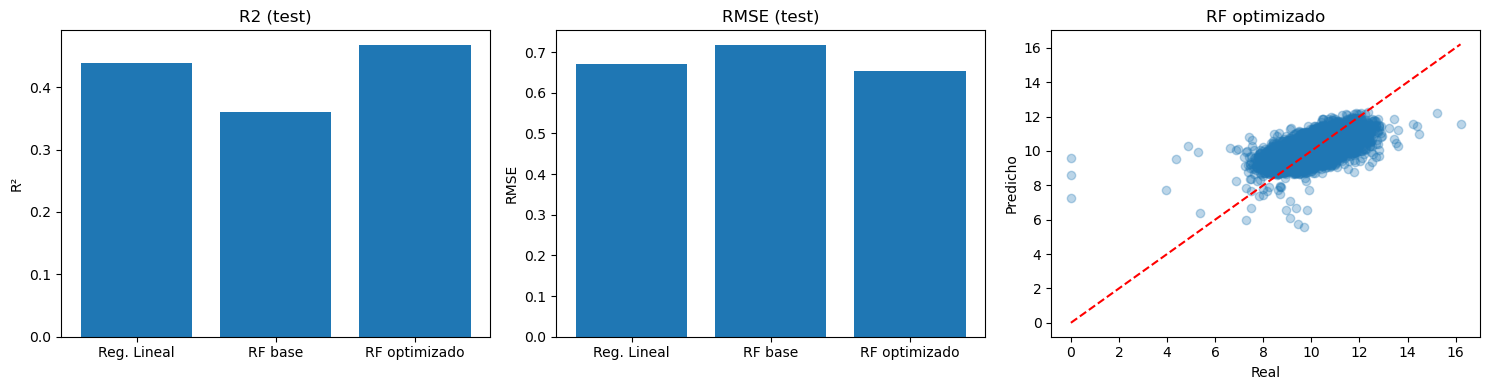

In [142]:
modelos = ['Reg. Lineal', 'RF base', 'RF optimizado']

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].bar(modelos, tabla_comp['R2 test'])
axs[0].set_title('R2 (test)')
axs[0].set_ylabel('R²')

axs[1].bar(modelos, tabla_comp['RMSE test'])
axs[1].set_title('RMSE (test)')
axs[1].set_ylabel('RMSE')

axs[2].scatter(y_test, y_pred_testRF2, alpha=0.3)
lims = [y_test.min(), y_test.max()]
axs[2].plot(lims, lims, 'r--')
axs[2].set_xlabel('Real')
axs[2].set_ylabel('Predicho')
axs[2].set_title('RF optimizado')

plt.tight_layout()
plt.show()

Se construyó una gráfica de barras comparando el valor de (R2) en el conjunto de prueba para la regresión lineal, el Random Forest base y el Random Forest optimizado, con el objetivo de analizar qué modelo explica mejor la variabilidad de los datos y evaluar su capacidad de generalización fuera del entrenamiento. Posteriormente, se elaboró una segunda gráfica de barras utilizando el RMSE en el conjunto de prueba, ya que esta métrica permite cuantificar el tamaño promedio del error en las mismas unidades de la variable objetivo y penaliza errores grandes, complementando así la información proporcionada por el (R2). Finalmente, se generó una gráfica de dispersión para el modelo Random Forest optimizado, comparando los valores reales contra los valores predichos e incluyendo una línea diagonal de referencia (línea ideal (y=x)), lo cual permite observar visualmente la precisión del modelo, la dispersión de los errores y la posible presencia de sesgos o outliers. Como se aprecia en la imagen mostrada, el RF optimizado presenta un mejor equilibrio entre mayor (R2) y menor RMSE respecto a los otros modelos, y la concentración de puntos alrededor de la línea diagonal indica un buen ajuste general, justificando su selección como el modelo con mejor desempeño dentro de la metodología aplicada.

El modelo **Random Forest optimizado** es el mejor porque presenta el mayor valor de R2 en el conjunto de prueba, lo que indica una mejor capacidad para explicar la variabilidad de los datos nuevos. Además, tiene los valores más bajos de RMSE y MAE, mostrando que sus predicciones tienen menor error promedio. A diferencia del RF base, su brecha entre R2 train y test es pequeña, lo que sugiere que no presenta sobreajuste significativo. Finalmente, en la gráfica de predichos vs reales se observa que los puntos se alinean mejor con la diagonal, confirmando un buen desempeño predictivo.

Importancia de variables - RF Optimizado:
educa_jefe    0.3314
ocupados      0.2312
est_socio     0.1772
percep_ing    0.1168
edad_jefe     0.0574
tam_loc       0.0365
p12_64        0.0311
clase_hog     0.0152
sexo_jefe     0.0033
dtype: float64


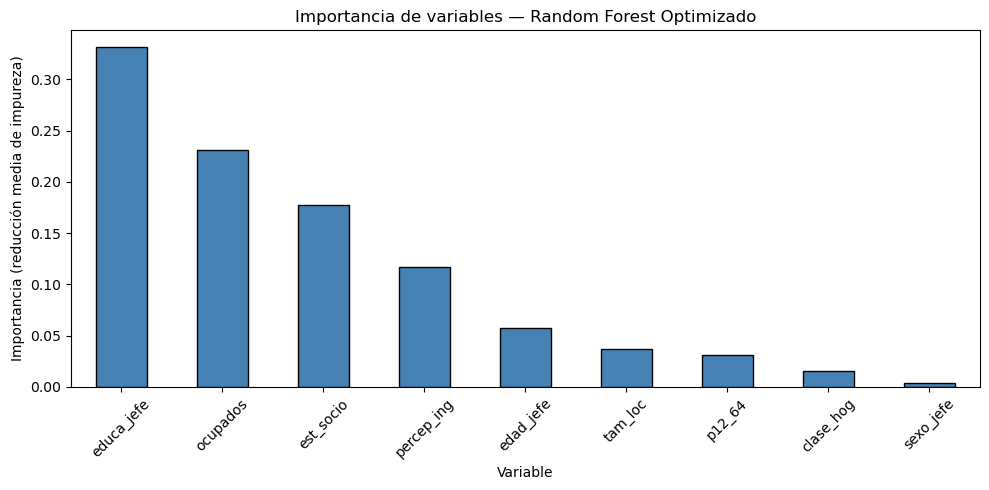

In [159]:
importancias = pd.Series(
    modelRF2.feature_importances_,
    index=features_finales
).sort_values(ascending=False)

print("Importancia de variables - RF Optimizado:")
print(importancias.round(4))

importancias.plot(kind='bar', figsize=(10, 5), color='steelblue', edgecolor='black')
plt.title('Importancia de variables — Random Forest Optimizado')
plt.ylabel('Importancia (reducción media de impureza)')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se extrae la importancia de variables del modelo Random Forest optimizado mediante el atributo feature_importances_, que mide la reducción promedio de impureza (criterio de Friedman MSE) que aporta cada variable en todos los árboles del ensamble. La variable est_socio (estrato socioeconómico) emerge como la más determinante del ingreso, seguida de educa_jefe y ocupados, lo cual es consistente con los coeficientes estimados en el modelo OLS inferencial. Este resultado confirma que el nivel socioeconómico del hogar es el predictor más fuerte del ingreso corriente total en México.

# Análisis de inferencia

In [144]:
X_inf = sm.add_constant(df[features_finales]) 
y_inf = df['log_ing_cor']

modelo_inf = sm.OLS(y_inf, X_inf).fit(cov_type='HC3')

print(modelo_inf.summary())

                            OLS Regression Results                            
Dep. Variable:            log_ing_cor   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     4958.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        19:15:41   Log-Likelihood:                -59267.
No. Observations:               58125   AIC:                         1.186e+05
Df Residuals:                   58115   BIC:                         1.186e+05
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9577      0.023    342.582      0.0

Se construyó un modelo de regresión lineal múltiple para poder interpretar cómo influye cada variable en el resultado. Se usó el método OLS y errores estándar robustos HC3 para que las conclusiones fueran más confiables incluso si los datos tienen variaciones irregulares. Con este modelo se pudieron calcular márgenes de error, intervalos de confianza y ver qué variables tienen un efecto significativo. Además, se evaluó el ajuste con R² y R² ajustado para medir qué tan bien explica los datos, permitiendo hacer interpretaciones claras y más seguras sobre la relación entre las variables.

Todas las variables resultaron estadísticamente significativas (p < 0.001), lo cual significa que sus efectos son altamente inconsistentes con la hipótesis nula. Los coeficientes más grandes corresponden a est_socio (B = 0.256 -> +29.2% en ingreso original) y ocupados (B = 0.196 -> +21.6%), seguidos de educa_jefe (B = 0.126 -> +13.5%). Las variables sexo_jefe y tam_loc presentan coeficientes negativos (−5.1% y −7.3% respectivamente), cuantificando la brecha de género y la desventaja de las localidades más pequeñas. Los intervalos de confianza al 95% son angostos en todos los casos, reflejando estimaciones muy precisas gracias al tamaño muestral.

No se utilizó Random Forest en esta etapa porque su principal objetivo es la predicción y no la interpretación estadística. Aunque Random Forest puede obtener buenos resultados predictivos, no permite analizar claramente el efecto individual de cada variable ni calcular intervalos de confianza o significancia estadística. En cambio, el modelo OLS con errores robustos HC3 sí permite realizar inferencia, ya que entrega coeficientes interpretables, márgenes de error y pruebas estadísticas que ayudan a entender la relación entre las variables y extraer conclusiones sobre el fenómeno estudiado, que es justamente lo que solicita la metodología del análisis.

# Puntos extra: escenario 'What-if...'

In [151]:
hogar_base = df[features_finales].mean()

def pred_rf(hogar):
    return np.expm1(modelRF2.predict([hogar])[0])

ing_base = pred_rf(hogar_base)

print("Ingreso base:", ing_base)

esc1 = hogar_base.copy()
esc1['educa_jefe'] += 1

print("Ingreso con +1 nivel educativo:", pred_rf(esc1))

esc2 = hogar_base.copy()
esc2['ocupados'] += 1

print("Ingreso con +1 ocupado:", pred_rf(esc2))

esc3 = hogar_base.copy()
esc3['tam_loc'] = 1

print("Ingreso en ciudad grande:", pred_rf(esc3))

Ingreso base: 29697.44140280347
Ingreso con +1 nivel educativo: 30772.57832722985
Ingreso con +1 ocupado: 28786.397505524747
Ingreso en ciudad grande: 32029.07157280325


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Se realizó un análisis de escenarios hipotéticos utilizando el modelo Random Forest optimizado, tomando como punto de partida un hogar de referencia definido por los valores promedio de las variables seleccionadas. A partir de este hogar base, se modificaron individualmente algunas variables relevantes para explorar cómo podrían cambiar los ingresos estimados bajo distintos supuestos. Los resultados muestran que aumentar un nivel educativo del jefe del hogar incrementa el ingreso predicho, lo cual es consistente con la teoría del capital humano. En cambio, añadir un integrante ocupado no necesariamente aumenta el ingreso en este caso, lo que sugiere que el efecto depende de la combinación específica de características del hogar capturada por el modelo no lineal. Finalmente, simular la residencia en una ciudad grande produce un aumento notable en el ingreso estimado, reflejando posibles diferencias estructurales entre zonas urbanas y rurales. Este ejercicio permite interpretar de forma práctica las implicaciones del modelo y analizar posibles escenarios reales, aunque los resultados deben entenderse como asociaciones predictivas y no como relaciones causales directas.

# Conclusiones

Este proyecto analizó los determinantes socioeconómicos del ingreso corriente total de los hogares mexicanos (ing_cor) a partir de datos de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2014, elaborada por el INEGI. A lo largo del trabajo se aplicó un flujo metodológico completo: exploración de los datos, tratamiento de problemas de calidad (valores faltantes, variables irrelevantes y transformación logarítmica para corregir la asimetría del ingreso), selección de características mediante tres métodos de selección escalonada (backward, forward y stepwise), construcción y comparación de modelos de regresión, evaluación de desempeño mediante métricas estándar, e inferencia estadística con errores robustos.

La combinación de tres criterios —convergencia de los métodos de selección de variables, estabilidad en validación cruzada y desempeño en el conjunto de prueba— condujo a un subconjunto estable de nueve predictores: clase_hog, edad_jefe, educa_jefe, est_socio, ocupados, p12_64, percep_ing, sexo_jefe y tam_loc. Sobre este conjunto se entrenaron tres modelos:

| Modelo | R² entrenamiento | R² prueba | Brecha | RMSE prueba | MAE prueba |
|---|---|---|---|---|---|
| Regresión Lineal | 0.4407 | 0.4387 | 0.0020 | 0.6719 | 0.4997 |
| RF base | 0.8494 | 0.3596 | 0.4898 | 0.7176 | 0.5331 |
| **RF optimizado** | **0.5386** | **0.4676** | **0.0710** | **0.6543** | **0.4843** |

El **Random Forest optimizado** es el mejor modelo por tres razones concretas: (1) obtiene el R² de prueba más alto (0.4676), lo que significa que explica el 46.8% de la variabilidad del ingreso logarítmico en datos no vistos; (2) registra el menor RMSE (0.6543) y el menor MAE (0.4843) en prueba, indicando que sus predicciones son en promedio las más cercanas al valor real; y (3) su brecha entre entrenamiento y prueba es de solo 7.1 puntos porcentuales, demostrando que la optimización de hiperparámetros (max_depth=10, min_samples_leaf=2, min_samples_split=14, n_estimators=1000) logró corregir el sobreajuste severo del RF base, donde la brecha era de casi 49 puntos.

La regresión lineal, aunque igualmente válida y muy estable (diferencia de 0.2%), captura únicamente relaciones lineales entre las variables y el ingreso, lo cual es una limitación importante dado que el comportamiento del ingreso en encuestas de hogares es inherentemente no lineal. El Random Forest, al construir múltiples árboles de decisión y promediar sus predicciones, puede capturar interacciones complejas entre variables sin necesidad de suponer una forma funcional específica, lo que lo hace más adecuado para este tipo de datos.

Los dos modelos empleados apuntan a la misma lista de variables relevantes, pero no coinciden en el primer lugar, lo que representa en sí mismo un hallazgo digno de interpretación.

Desde el modelo OLS inferencial, la variable con mayor efecto marginal sobre el ingreso es est_socio (estrato socioeconómico), con un coeficiente B = 0.256 que equivale a una diferencia de aproximadamente +29.2% en ingreso real entre estratos. Le siguen ocupados (B = 0.196, +21.6%) y educa_jefe (B = 0.126, +13.5%). El OLS mide el efecto marginal y lineal de cada variable manteniendo las demás constantes. Desde el Random Forest optimizado, la variable más importante es educa_jefe (nivel educativo del jefe del hogar) con una importancia de 0.3314, seguida de ocupados (0.2312) y est_socio (0.1772). El RF mide la reducción total de impureza que cada variable aporta en todos los árboles del ensamble, capturando tanto efectos directos como interacciones no lineales con otras variables.

El OLS le asigna mayor peso a est_socio porque, al controlar por todas las demás variables simultáneamente, captura el efecto neto y directo sobre el ingreso. El Random Forest, en cambio, le asigna mayor peso a educa_jefe porque, en el contexto de interacciones complejas entre variables, la educación del jefe es la que más veces y con mayor ganancia divide los datos hacia predicciones más precisas. Se puede concluir que la educación del jefe del hogar es el la variable más influyente del ingreso en un modelo no lineal, mientras que el estrato socioeconómico es la variable mas influyente en un modelo lineal controlado.

Las variables sexo del jefe de hogar y tamaño de la localidad, junto con ocupados, explican gran parte del ingreso de los hogares mexicanos. Los hogares encabezados por mujeres ganan en promedio 5.1% menos que los encabezados por hombres. Los hogares en localidades pequeñas tienen 7.3% menos ingreso que los de las grandes ciudades. Todos estos efectos son estadísticamente significativos gracias a la gran muestra de 58,125 hogares.

## *¿Qué nos dice el modelo?*

El modelo explica alrededor del 44–47% de las diferencias en los ingresos, lo cual es normal para estudios de hogares en países de ingreso medio. El resto de las diferencias se debe a cosas que no se pueden medir en la encuesta, como herencia, contactos sociales, habilidades personales o decisiones laborales. El modelo no predice el ingreso exacto de nadie; solo muestra tendencias y relaciones generales entre las variables.

El modelo OLS HC3 nos da márgenes de error claros para cada efecto. Por ejemplo, un año más de educación del jefe del hogar aumenta el ingreso entre 12.4% y 12.9%, con mucha precisión.
Los errores estándar robustos HC3 aseguran que estas estimaciones sean confiables, incluso cuando los datos de ingresos varían mucho entre hogares.

## *Relevancia social e implementación del modelo*

El modelo tiene utilidad práctica en tres formas principales:

1. Mejorar la focalización de políticas: Identifica que los hogares con estrato bajo, jefes con poca educación y pocos ocupados tienen menos ingresos, por lo que programas sociales, educativos o de empleo pueden priorizarlos.
2. Detectar brechas estructurales: Muestra que los hogares encabezados por mujeres ganan 5.1% menos y los de localidades pequeñas 7.3% menos, lo que ayuda a diseñar programas específicos por género o ubicación.
3. Monitoreo y diagnóstico territorial: Como se basa en datos nacionales, se puede usar en años futuros para ver cómo cambian los ingresos y evaluar el efecto de políticas o reformas.
Implementación práctica: El modelo puede funcionar en Python con scikit-learn usando las nueve variables que se recogen en la ENIGH o el Censo, generando estimaciones de ingreso para cualquier hogar de forma rápida y sencilla, sin tecnología complicada.

## *¿Es realista su aplicación?*

El modelo es útil y confiable para analizar tendencias, pero tiene limitaciones importantes:

1. Datos antiguos: Se basa en la ENIGH 2014, y desde entonces han cambiado salarios, programas sociales y el mercado laboral; algunos efectos podrían ser diferentes hoy.
2. No garantiza causalidad: El modelo muestra relaciones estadísticas, no causa directa; aumentar educación del jefe no asegura el mismo aumento de ingreso.
3. Mucho no explicado: Explica solo 47% de las diferencias en ingresos, así que no sirve para decisiones sobre hogares individuales, solo para análisis generales.
4. Limitaciones en ingresos extremos: Hogares con ingresos muy altos o muy bajos no se ajustan bien; el modelo es una aproximación basada en nueve variables.

## *Reflexión crítica y trabajo futuro*

Este proyecto demostró que es posible construir un modelo estadísticamente robusto y socialmente significativo para caracterizar el ingreso de los hogares mexicanos con un conjunto reducido de variables disponibles en fuentes públicas. La convergencia de múltiples métodos de selección hacia las mismas nueve variables refuerza la validez del análisis, y el hecho de que los resultados sean consistentes entre el modelo lineal (interpretable) y el Random Forest (no lineal) otorga solidez a las conclusiones.

Como líneas de trabajo futuro, sería valioso:
1. Replicar el análisis con la ENIGH 2022 para evaluar la vigencia de las asociaciones encontradas
2. Incorporar variables geográficas más granulares (estado o municipio) que permitan capturar heterogeneidad regional
3. Explorar modelos de regresión cuantílica para analizar si los determinantes del ingreso difieren entre hogares de bajos, medios y altos ingresos

# Referencias

Instituto Nacional de Estadística y Geografía. (2014). *Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2014: Nueva serie — Principales variables por hogar*. INEGI. https://www.inegi.org.mx/programas/enigh/nc/2014/

UDEM (2026) Presentaciones del curso de Inteligencia Artificial - Dr. Antonio Martínez Torteya

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). *Scikit-learn: Machine learning in Python*. Journal of Machine Learning Research. https://scikit-learn.org/stable/

scikit-learn developers. (2024). *RandomForestRegressor*. scikit-learn Documentation. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

scikit-learn developers. (2024). *RandomizedSearchCV*. scikit-learn Documentation. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

scikit-learn developers. (2024). *Feature importances with a forest of trees*. scikit-learn Documentation. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

scikit-learn developers. (2024). *Cross-validation: Evaluating estimator performance*. scikit-learn Documentation. https://scikit-learn.org/stable/modules/cross_validation.html

Seabold, S., & Perktold, J. (2010). *Statsmodels: Econometric and statistical modeling with Python*. Statsmodels Documentation. https://www.statsmodels.org/stable/regression.html

Statsmodels developers. (2024). *Heteroscedasticity robust covariance (HC3)*. Statsmodels Documentation. https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.get_robustcov_results.html

McKinney, W. (2022). *pandas: Powerful Python data analysis toolkit*. pandas Documentation. https://pandas.pydata.org/docs/

Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment*. Matplotlib Documentation. https://matplotlib.org/stable/index.html

Waskom, M. (2021). *Seaborn: Statistical data visualization*. Seaborn Documentation. https://seaborn.pydata.org/

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S., Smith, N. J., Kern, R., Picus, M., Hoyer, S., van Kerkwijk, M. H., Brett, M., Haldane, A., del Río, J. F., Wiebe, M., Peterson, P., … Oliphant, T. E. (2020). *Array programming with NumPy*. NumPy Documentation. https://numpy.org/doc/stable/

Consejo Nacional de Evaluación de la Política de Desarrollo Social. (2023). *Metodología para la medición multidimensional de la pobreza en México*. CONEVAL. https://www.coneval.org.mx/Medicion/Paginas/Metodologia.aspx

Organización para la Cooperación y el Desarrollo Económicos. (2024). *Income inequality: Gini coefficient — Mexico*. OECD Data. https://data.oecd.org/inequality/income-inequality.htm

Breiman, L. (2001). *Random forests*. Statistics & Machine Learning — Conceptual Overview. https://link.springer.com/article/10.1023/A:1010933404324

Banco Mundial. (2024). *Gini index — Mexico*. World Bank Open Data. https://data.worldbank.org/indicator/SI.POV.GINI?locations=MX

White, H. (1980). *A heteroskedasticity-consistent covariance matrix estimator and a direct test for heteroskedasticity* — Referencia metodológica HC3. Econometric Society. https://www.econometricsociety.org/publications/econometrica/1980/05/01/heteroskedasticity-consistent-covariance-matrix-estimator